In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Recommendation Systems

## Content Based Recommendation Systems
## Collaborative Filtering Systems
협업필터링

In [3]:
x1, y1 = (1, 5)
x2, y2 = (5, 2)

a = [x1, y1]
b = [x2, y2]
a, b

([1, 5], [5, 2])

## Euclidean distance

Euclidean distance: 5.0


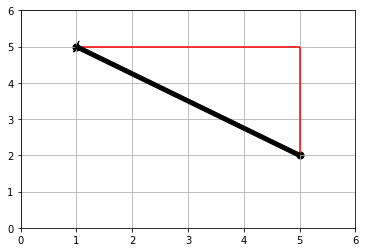

In [31]:
plt.scatter(x=x1, y=y1, c='k', s=50)  # s: marker size c: color as 'k'black
plt.scatter(x=x2, y=y2, c='k', s=50)

# Set the x-limits & y-limits of the current axes
plt.xlim([0, 6])
plt.ylim([0, 6])

plt.grid()

# higher distance
plt.vlines(x=max(x1, x2), ymin=min(y1, y2), ymax=max(y1, y2), color='r')
plt.hlines(y=max(y1, y2), xmin=min(x1, x2), xmax=max(x1, x2), color='r')

# lines between two dots : Annotate(to draw arrow between)the point *xy* with text *text*
plt.annotate(s='', xy=(x1, y1), xytext=(x2, y2), arrowprops=dict(facecolor='black', shrink=0, headlength=0.0001))

print(f'Euclidean distance: {np.sqrt((x2-x1)**2 + (y2-y1)**2)}')

In [5]:
pd.read_csv('./data/movie_ratings.csv')

,Movie,Brandon,Emily,Cleo,Rusty,Samantha
0,Aquaman,4,1,2,2,2
1,Avengers: Infinity War,2,5,2,5,5
2,Black Panther,5,2,5,1,1
3,Bohemian Rhapsody,2,3,4,4,1
4,Deadpool 2,3,2,4,5,1
5,Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5
6,Incredibles 2,4,2,3,4,4
7,Jurassic World: Fallen Kingdom,2,3,5,4,5
8,Mission: Impossible – Fallout,5,5,4,3,2
9,Venom,4,1,4,5,2


In [6]:
ratings = pd.read_csv('./data/movie_ratings.csv').set_index('Movie').T
ratings

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


In [7]:
ratings.index

Index(['Brandon', 'Emily', 'Cleo', 'Rusty', 'Samantha'], dtype='object')

In [14]:
type(ratings.index)

pandas.core.indexes.base.Index

In [21]:
list(ratings.index)

['Brandon', 'Emily', 'Cleo', 'Rusty', 'Samantha']

In [12]:
def ratings_scatter(movie1, movie2):
    '''
    Input the selecting 2 title of movies, as (x, y), 
    outcome will be position of ratings for each users
    '''
    
    x = ratings.loc[:, movie1]
    y = ratings.loc[:, movie2]
       
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x, y, s=50, marker='x')
    
    plt.title(f"Preference Space for {movie1} vs. {movie2}", fontsize=20)
    plt.grid()
    
    ax.set_xlabel(movie1, fontsize=16)
    ax.set_ylabel(movie2, fontsize=16) 
    
    
    n = list(ratings.index)
    for i, txt in enumerate(n):
        
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

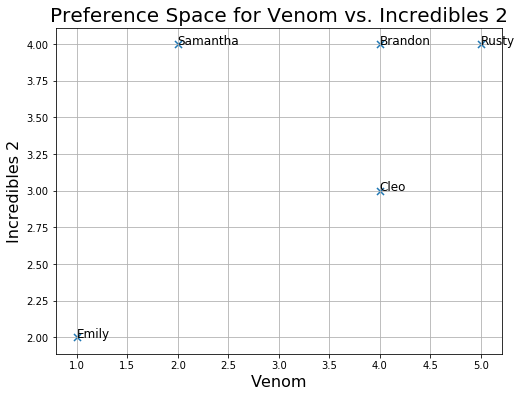

In [13]:
ratings_scatter('Venom', 'Incredibles 2')

# Measuring distances in python

`from sklearn.metrics import pairwise_distances`<br>
`from scipy.spatial.distance import pdist, squareform`

> - `pdist(X, metric='euclidean')`: 
>  Pairwise distances between observations in n-dimensional space
> - `squareform(X)`:
>  Convert a vector-form distance vector to a square-form distance matrix, and vice-versa


## Toy problem

In [32]:
a = (x1, y1)
b = (x2, y2)
a, b

((1, 5), (5, 2))

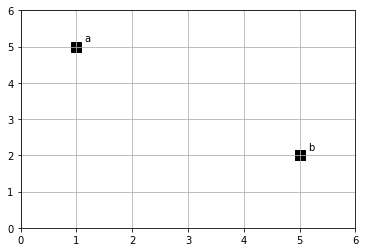

In [30]:
fig = plt.figure()

plt.scatter(x1, y1, color='k', marker='s', s=100)
plt.scatter(x2, y2, color='k', marker='s', s=100)

plt.grid()
plt.xlim([0, 6])
plt.ylim([0, 6])

# the text *s* is placed at *xy* --> *xytext* :  If *None*, defaults to *xy* 
plt.annotate(s='a', xy=np.array(a) + (0.15, 0.15));
plt.annotate(s='b', xy=np.array(b) + (0.15, 0.15));

### from sklearn.metrics import pairwise_distances


In [38]:
from sklearn.metrics import pairwise_distances

pairwise_distances([a,b])

array([[0., 5.],
       [5., 0.]])

### from scipy.spatial.distance import pdist, squareform

In [39]:
from scipy.spatial.distance import pdist, squareform

pdist([a,b])

array([5.])

In [40]:
squareform(pdist([a,b]))

array([[0., 5.],
       [5., 0.]])

### transform to DataFrame

In [43]:
pd.DataFrame(squareform(pdist([a,b])),
            index=['a','b'],
            columns=['a','b'])

,a,b
a,0.0,5.0
b,5.0,0.0


## Real application: Measuring distance in terms of movie ratings

In [45]:
ratings = pd.read_csv('./data/movie_ratings.csv').set_index('Movie').T
ratings.head()

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


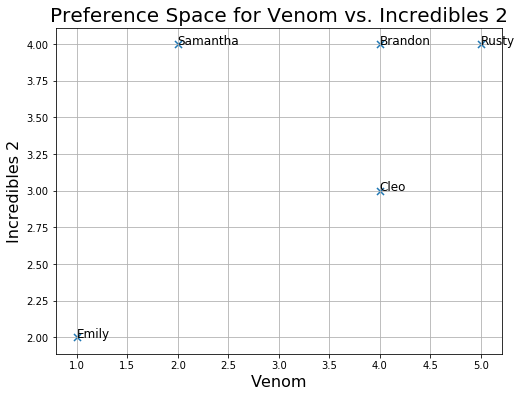

In [46]:
ratings_scatter('Venom', 'Incredibles 2')

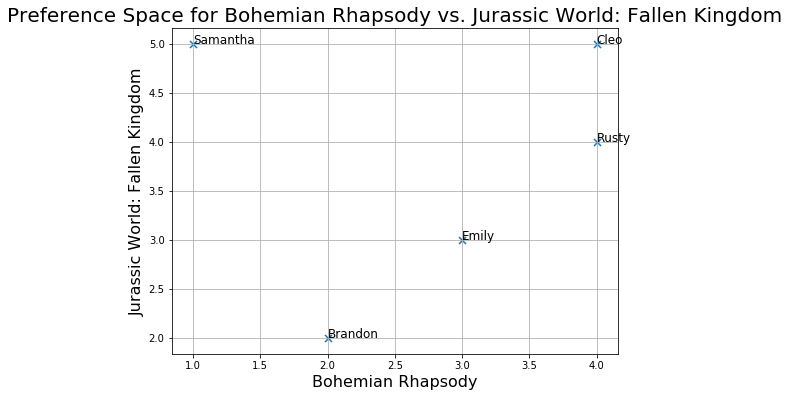

In [47]:
ratings_scatter('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')

In [52]:
distance = squareform(pdist(ratings[['Venom', 'Incredibles 2']]))
distance

array([[0.        , 3.60555128, 1.        , 1.        , 2.        ],
       [3.60555128, 0.        , 3.16227766, 4.47213595, 2.23606798],
       [1.        , 3.16227766, 0.        , 1.41421356, 2.23606798],
       [1.        , 4.47213595, 1.41421356, 0.        , 3.        ],
       [2.        , 2.23606798, 2.23606798, 3.        , 0.        ]])

## What happens if we calculated the distance for the whole dataset, then?

It considers all columns as dimensions. And it will calculate the distance in that big dimension.

In [55]:
ratings

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


In [56]:
distance = pdist(ratings)

In [57]:
squareform(distance)

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [59]:
distance_matrix = pd.DataFrame(squareform(distance),
                               index=ratings.index,
                               columns=ratings.index)
distance_matrix

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,0.000000,6.633250,6.000000,7.416198,7.483315
Emily,6.633250,0.000000,6.928203,6.403124,5.099020
Cleo,6.000000,6.928203,0.000000,5.567764,8.246211
Rusty,7.416198,6.403124,5.567764,0.000000,6.708204
Samantha,7.483315,5.099020,8.246211,6.708204,0.000000


### Similarity: 1/(1 + squareform(pdist())

In [ ]:
# inverse of distance is how similar: 1/squareform(distance)
# but I want to put the most similar as 1: 1/(1 + squareform(distance))

In [60]:
similarity_index = pd.DataFrame(1/(1 + squareform(distance)), 
                                index=ratings.index, 
                                columns=ratings.index)
similarity_index

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


### Make Function 

In [62]:
def create_similarity(dataframe, metric='euclidean'):
    """
    Given a dataframe, return its similarity matrix 
    """
    distance_vector = pdist(dataframe, metric)
    distance_matrix = squareform(distance_vector)
    similarities = 1 / (1 + distance_matrix)
    
    similarity_index = pd.DataFrame(similarities, 
                                    index=dataframe.index, 
                                    columns=dataframe.index)
    return similarity_index

In [63]:
create_similarity(ratings)

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


### New Person: Andre

a new user named `Andre` who came to us with the following ratings for each movie

In [64]:
new_person = {'Aquaman': 2,
              'Avengers: Infinity War': 1,
              'Black Panther': 5,
              'Bohemian Rhapsody': 5,
              'Deadpool 2': 2,
              'Fantastic Beasts: The Crimes of Grindelwald': 3,
              'Incredibles 2': 3,
              'Jurassic World: Fallen Kingdom': 4,
              'Mission: Impossible – Fallout': 3,
              'Venom': 3}

In [66]:
ratings

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


In [74]:
pd.Series(new_person, name='Andre')

Aquaman                                        2
Avengers: Infinity War                         1
Black Panther                                  5
Bohemian Rhapsody                              5
Deadpool 2                                     2
Fantastic Beasts: The Crimes of Grindelwald    3
Incredibles 2                                  3
Jurassic World: Fallen Kingdom                 4
Mission: Impossible – Fallout                  3
Venom                                          3
Name: Andre, dtype: int64

In [78]:
person = pd.DataFrame(pd.Series(new_person, name='Andre')).T
person

,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Andre,2,1,5,5,2,3,3,4,3,3


In [79]:
merged_dataframe = pd.concat([ratings, person], axis=0)
merged_dataframe

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2
Andre,2,1,5,5,2,3,3,4,3,3


In [80]:
# apply to the function 
similarities = create_similarity(merged_dataframe)
similarities

,Brandon,Emily,Cleo,Rusty,Samantha,Andre
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.135078
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.217129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.126132
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.116961
Andre,0.156613,0.135078,0.217129,0.126132,0.116961,1.000000


In [94]:
# Andre into the similarity matrix and then determine which other users are most similar to him
similarities['Andre'].sort_values(ascending=False)[1:]

Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Andre, dtype: float64

- It looks like Cleo is the user that is most similar to Andre, followed by Brandon, Emily, Rusty, and then Samantha. <br>
- These similarity scores should be taken into consideration when recommending movies to Tom that he has not yet seen.

In [83]:
# Drop it to maintain original dataset of ratings
similarities['Andre'].drop('Andre')

Brandon     0.156613
Emily       0.135078
Cleo        0.217129
Rusty       0.126132
Samantha    0.116961
Name: Andre, dtype: float64

---

### To generate movie recommendations to Andre that he has not yet seen

- Let's say that everyone but Andre also rated the movies in the movie_ratings2.csv file. <br>
- Let's import those ratings and then combine them with the similarity scores to generate movie recommendations to Andre

In [84]:
new_ratings = pd.read_csv('./data/movie_ratings2.csv').set_index('Movie')
new_ratings.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5


In [85]:
recommendations = new_ratings.copy()
recommendations.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5


In [86]:
similarities['Andre'].drop('Andre')

Brandon     0.156613
Emily       0.135078
Cleo        0.217129
Rusty       0.126132
Samantha    0.116961
Name: Andre, dtype: float64

In [87]:
dict(similarities['Andre'].drop('Andre'))

{'Brandon': 0.1566130288262323,
 'Emily': 0.13507810593582123,
 'Cleo': 0.21712927295533244,
 'Rusty': 0.1261319836228832,
 'Samantha': 0.11696132920126338}

In [90]:
# dictionary method items() returns a list of dict's (key, value) tuple pairs
dict(similarities['Andre'].drop('Andre')).items()

dict_items([('Brandon', 0.1566130288262323), ('Emily', 0.13507810593582123), ('Cleo', 0.21712927295533244), ('Rusty', 0.1261319836228832), ('Samantha', 0.11696132920126338)])

---

- We are going to iterate through each of the other users' similarity scores with Andre and weight their recommendations of these new movies by their similarity score.

In [91]:
for name, score in dict(similarities['Andre'].drop('Andre')).items():
    # contribuição de todos os meus amigos, 
    # ponderados pela distância deles para mim (score)
    recommendations[name] = recommendations[name] * score

recommendations.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807


---

- We are then going to create a new Total column that sums up the total scores for each movie and sort on that so that the movies are in the order that they should be recommended to Andre

In [92]:
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


* From these results, it looks like Tom should like Despicable Me 3, Wonder Woman, and Thor but perhaps not Star Wars or The Fate of the Furious.